In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

train_dataset = train.flow_from_directory('C:\\Users\\ASOMAN\\Desktop\\DSV\\ForestFire\\Training and Validation', target_size = (150,150), batch_size = 32, class_mode = 'binary')

test_dataset = test.flow_from_directory('C:\\Users\\ASOMAN\\Desktop\\DSV\\ForestFire\\Testing', target_size = (150,150), batch_size = 32, class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [5]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
58/58 [==============================] - 49s 766ms/step - loss: 0.3189 - accuracy: 0.8701 - val_loss: 0.2862 - val_accuracy: 0.9118
Epoch 2/5
58/58 [==============================] - 37s 629ms/step - loss: 0.1537 - accuracy: 0.9460 - val_loss: 0.3379 - val_accuracy: 0.8824
Epoch 3/5
58/58 [==============================] - 37s 632ms/step - loss: 0.1420 - accuracy: 0.9514 - val_loss: 0.2678 - val_accuracy: 0.8971
Epoch 4/5
58/58 [==============================] - 37s 634ms/step - loss: 0.1084 - accuracy: 0.9629 - val_loss: 0.2222 - val_accuracy: 0.9559
Epoch 5/5
58/58 [==============================] - 37s 629ms/step - loss: 0.0744 - accuracy: 0.9765 - val_loss: 0.2109 - val_accuracy: 0.8971


In [7]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

In [8]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [9]:
print(len(predictions))

68


In [10]:
def predictImage(filename):
    img1 = image.load_img(filename, target_size = (150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis = 0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel('No Fire', fontsize = 30)
    else:
        plt.xlabel('Fire', fontsize = 30)

[[0.]]


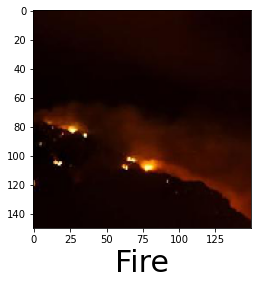

In [11]:
predictImage("C:\\Users\\ASOMAN\\Desktop\\DSV\\ForestFire\\Testing\\fire\\abc172.jpg")

[[0.]]


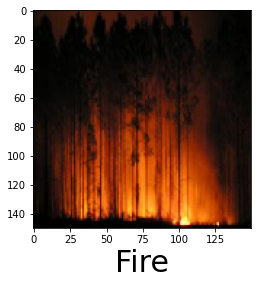

In [12]:
predictImage("C:\\Users\\ASOMAN\\Desktop\\DSV\\ForestFire\\Testing\\fire\\abc176.jpg")

[[0.]]


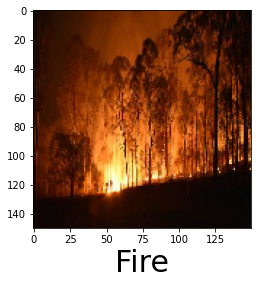

In [13]:
predictImage("C:\\Users\\ASOMAN\\Desktop\\DSV\\ForestFire1.jpg")

[[1.]]


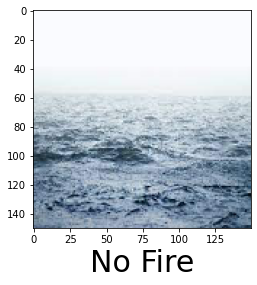

In [14]:
predictImage("C:\\Users\\ASOMAN\\Desktop\\DSV\\NotForestFire1.jpg")